In [47]:
import streamlit as st
import pandas as pd
import numpy as np
import plotly.express as px
import re
import matplotlib.pyplot as plt

In [8]:
data=pd.read_csv("../data/gsearch_jobs.csv")

In [17]:
columns_to_check = ['salary_avg', 'salary_min', 'salary_max', 'salary_yearly', 'salary_standardized']
data = data.dropna(subset=columns_to_check)
data.head()


,Unnamed: 0,index,title,company_name,location,via,description,extensions,job_id,thumbnail,...,commute_time,salary_pay,salary_rate,salary_avg,salary_min,salary_max,salary_hourly,salary_yearly,salary_standardized,description_tokens
99,99,99,Data Analyst - 7010605,State of Missouri,"Jefferson City, MO",via Indeed,"Salary: $2,132.85 - $2,175.50 semi-monthly * s...","['11 hours ago', '51,188.40–52,200.00 a year',...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QgLSA3MDEwNj...,NaN,...,NaN,51188.40–52200.00,a year,51694.2,51188.4,52200.0,NaN,51694.2,51694.2,['tableau']
107,107,107,Data Analyst,Get It Recruit - Information Technology,Anywhere,via Get.It,"Summary Description:\nAt STAT Recovery, we are...","['13 hours ago', '75K–95K a year', 'Work from ...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,https://encrypted-tbn0.gstatic.com/images?q=tb...,...,NaN,75K–95K,a year,85000.0,75000.0,95000.0,NaN,85000.0,85000.0,"['excel', 'sql', 'alteryx']"
115,115,115,Data Analyst (ID#10255),Worldgate LLC,"Tulsa, OK",via Indeed,World gate recruiter team is looking for a ful...,"['14 hours ago', '100K–120K a year', 'Full-tim...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QgKElEIzEwMj...,NaN,...,NaN,100K–120K,a year,110000.0,100000.0,120000.0,NaN,110000.0,110000.0,"['python', 'excel', 'sql', 'powershell', 'word..."
170,170,170,Data Engineer,RightPro Staffing,Anywhere,via LinkedIn,Data Engineer\n\nSummary...\n\nResponsible for...,"['10 hours ago', '100K–145K a year', 'Work fro...",eyJqb2JfdGl0bGUiOiJEYXRhIEVuZ2luZWVyIiwiaHRpZG...,https://encrypted-tbn0.gstatic.com/images?q=tb...,...,NaN,100K–145K,a year,122500.0,100000.0,145000.0,NaN,122500.0,122500.0,"['aws', 'python', 'redshift', 'sql']"
199,199,199,Epic Inpatient Clarity/Senior Clinical Busines...,Engage Partners Inc.,Anywhere,via LinkedIn,Now Hiring: Epic Inpatient Clarity/Senior Clin...,"['15 hours ago', '100K–118K a year', 'Work fro...",eyJqb2JfdGl0bGUiOiJFcGljIElucGF0aWVudCBDbGFyaX...,https://encrypted-tbn0.gstatic.com/images?q=tb...,...,NaN,100K–118K,a year,109000.0,100000.0,118000.0,NaN,109000.0,109000.0,"['sap', 'tableau']"


In [31]:
selected_columns = ['index', 'title', 'location', 'salary_pay', 'salary_rate',
                     'salary_avg', 'salary_min', 'salary_max', 'salary_yearly',
                     'salary_standardized', 'description_tokens']
data = data[selected_columns]
data.head()

,index,title,location,salary_pay,salary_rate,salary_avg,salary_min,salary_max,salary_yearly,salary_standardized,description_tokens
99,99,Data Analyst,"Jefferson City, MO",51188.40–52200.00,a year,51694.2,51188.4,52200.0,51694.2,51694.2,['tableau']
107,107,Data Analyst,Anywhere,75K–95K,a year,85000.0,75000.0,95000.0,85000.0,85000.0,"['excel', 'sql', 'alteryx']"
115,115,Data Analyst,"Tulsa, OK",100K–120K,a year,110000.0,100000.0,120000.0,110000.0,110000.0,"['python', 'excel', 'sql', 'powershell', 'word..."
170,170,Data Engineer,Anywhere,100K–145K,a year,122500.0,100000.0,145000.0,122500.0,122500.0,"['aws', 'python', 'redshift', 'sql']"
199,199,Epic Inpatient Clarity/Senior Clinical Busines...,Anywhere,100K–118K,a year,109000.0,100000.0,118000.0,109000.0,109000.0,"['sap', 'tableau']"


In [32]:
# Enforce specific job titles, remove numeric characters, and save unrecognized titles
valid_job_titles = ['Data Analyst', 'Data Scientist', 'Data Engineer']

def clean_job_title(title):
    cleaned_title = None

    # Remove numeric characters
    title = re.sub(r'\d', '', title)

    for valid_title in valid_job_titles:
        if valid_title.lower() in title.lower():
            cleaned_title = valid_title
            break

    if cleaned_title:
        return cleaned_title
    else:
        # Use a more flexible matching approach to capture broader categories
        matched_categories = re.findall(r'Data\s*(Analyst|Scientist|Engineer)', title, flags=re.IGNORECASE)
        if matched_categories:
            return f"Data {matched_categories[0].capitalize()}"
        else:
            # Print or save to a database the unrecognized job title
            print(f"Unrecognized job title: {title}")
            return title

data['title'] = data['title'].apply(clean_job_title)

# Print the cleaned data
print("Cleaned Data:")
data.head()

Unrecognized job title: Epic Inpatient Clarity/Senior Clinical Business Intelligence Analyst
Unrecognized job title: Business Systems Analyst II - Data Warehouse
Unrecognized job title: Principal Decision Science Analyst - Consumer Lending
Unrecognized job title: Facility Operations Operational Analyst
Unrecognized job title: Sr. Data Governance Analyst
Unrecognized job title: Financial Data Guru (SQL/Excel)
Unrecognized job title: CRM Analyst
Unrecognized job title: CRM Analyst
Unrecognized job title: Manager - Data Analytics
Unrecognized job title: Business Intelligence Analyst
Unrecognized job title: Business Analyst- Enterprise Data & Research
Unrecognized job title: PowerBI Analyst
Unrecognized job title: Sr. Business Analyst - Data Organization
Unrecognized job title: Business Analyst, Data Cleansing
Unrecognized job title: Associate Director of Marketing Analytics
Unrecognized job title: Regulatory Compliance Manager - US Compliance Analytics
Unrecognized job title: Hybrid - Bus

,index,title,location,salary_pay,salary_rate,salary_avg,salary_min,salary_max,salary_yearly,salary_standardized,description_tokens
99,99,Data Analyst,"Jefferson City, MO",51188.40–52200.00,a year,51694.2,51188.4,52200.0,51694.2,51694.2,['tableau']
107,107,Data Analyst,Anywhere,75K–95K,a year,85000.0,75000.0,95000.0,85000.0,85000.0,"['excel', 'sql', 'alteryx']"
115,115,Data Analyst,"Tulsa, OK",100K–120K,a year,110000.0,100000.0,120000.0,110000.0,110000.0,"['python', 'excel', 'sql', 'powershell', 'word..."
170,170,Data Engineer,Anywhere,100K–145K,a year,122500.0,100000.0,145000.0,122500.0,122500.0,"['aws', 'python', 'redshift', 'sql']"
199,199,Epic Inpatient Clarity/Senior Clinical Busines...,Anywhere,100K–118K,a year,109000.0,100000.0,118000.0,109000.0,109000.0,"['sap', 'tableau']"


In [36]:
data['description_tokens'] = data['description_tokens'].apply(lambda x: x.replace('[', '').replace(']', '').replace("'", "").split(', '))
data.head()

,index,title,location,salary_pay,salary_rate,salary_avg,salary_min,salary_max,salary_yearly,salary_standardized,description_tokens
99,99,Data Analyst,"Jefferson City, MO",51188.40–52200.00,a year,51694.2,51188.4,52200.0,51694.2,51694.2,[tableau]
107,107,Data Analyst,Anywhere,75K–95K,a year,85000.0,75000.0,95000.0,85000.0,85000.0,"[excel, sql, alteryx]"
115,115,Data Analyst,"Tulsa, OK",100K–120K,a year,110000.0,100000.0,120000.0,110000.0,110000.0,"[python, excel, sql, powershell, word, outlook..."
170,170,Data Engineer,Anywhere,100K–145K,a year,122500.0,100000.0,145000.0,122500.0,122500.0,"[aws, python, redshift, sql]"
199,199,Epic Inpatient Clarity/Senior Clinical Busines...,Anywhere,100K–118K,a year,109000.0,100000.0,118000.0,109000.0,109000.0,"[sap, tableau]"


In [68]:
skills_list = [word.lower().replace("'", "") for skills in data['description_tokens'].dropna() for word in skills]

# Create a DataFrame with skill counts
skills_df = pd.DataFrame({'skill': skills_list})
skills_df['count'] = 1  # Add a count of 1 for each skill occurrence

# Filter out empty strings
skills_df = skills_df[skills_df['skill'].str.strip() != '']

# Group by 'skill' and sum the counts
skills_df = skills_df.groupby('skill').sum().reset_index()

skills_df = skills_df.sort_values(by='count', ascending=False)

# Print the new DataFrame
print("Skills and Counts:")
skills_df.head()

Skills and Counts:


,skill,count
88,sql,1429
93,tableau,923
21,excel,763
67,python,631
62,power_bi,541


In [76]:
skills_salary_list = []

# Iterate over each row in 'data'
for index, row in data.iterrows():
    description_tokens = row['description_tokens']
    salary_avg = row['salary_avg']
    
    # Flatten the lists in 'description_tokens' and extract full words
    skills_list = [word.lower().replace("'", "") for word in description_tokens for word in word.split(',')]
    
    # Filter out empty strings
    skills_list = [skill.strip() for skill in skills_list if skill.strip() != '']
    
    # Append skill and salary pairs to the list
    skills_salary_list.extend([(skill, salary_avg) for skill in skills_list])



In [78]:
# Create a DataFrame with skill and corresponding salary
skills_salary_df = pd.DataFrame(skills_salary_list, columns=['skill', 'salary_avg'])

# Filter out empty strings and NaN salaries
skills_salary_df = skills_salary_df.dropna(subset=['salary_avg'])

# Group by 'skill' and calculate the mean salary for each skill
skills_summary = skills_salary_df.groupby('skill')['salary_avg'].mean().reset_index()

# Round the average salary to two decimal places
skills_summary['salary_avg'] = skills_summary['salary_avg'].round(2)

# Sort the skills_summary DataFrame by average salary in descending order
skills_summary = skills_summary.sort_values(by='salary_avg', ascending=False)


Top 10 Skills with Highest Average Salaries:
          skill  salary_avg
97   typescript   200000.00
48         nltk   180802.50
71        redis   175000.00
13        c/c++   173750.00
53  objective-c   164500.00
79      seaborn   161666.67
73         ruby   158838.40
38        keras   152916.67
17    datarobot   152000.00
85       splunk   147500.00


In [83]:
# Merge skills_summary with the original skills_df DataFrame based on the 'skill' column
merged_skills_df = pd.merge(skills_summary, skills_df, on='skill', how='left')

# Print the merged DataFrame for verification
print("Merged DataFrame:")
print(merged_skills_df.head())
merged_skills_df= merged_skills_df.sort_values(by='count', ascending=False)

top_10_skills = merged_skills_df.head(10)


Merged DataFrame:
         skill  salary_avg  count
0   typescript    200000.0      1
1         nltk    180802.5      2
2        redis    175000.0      1
3        c/c++    173750.0      2
4  objective-c    164500.0      1


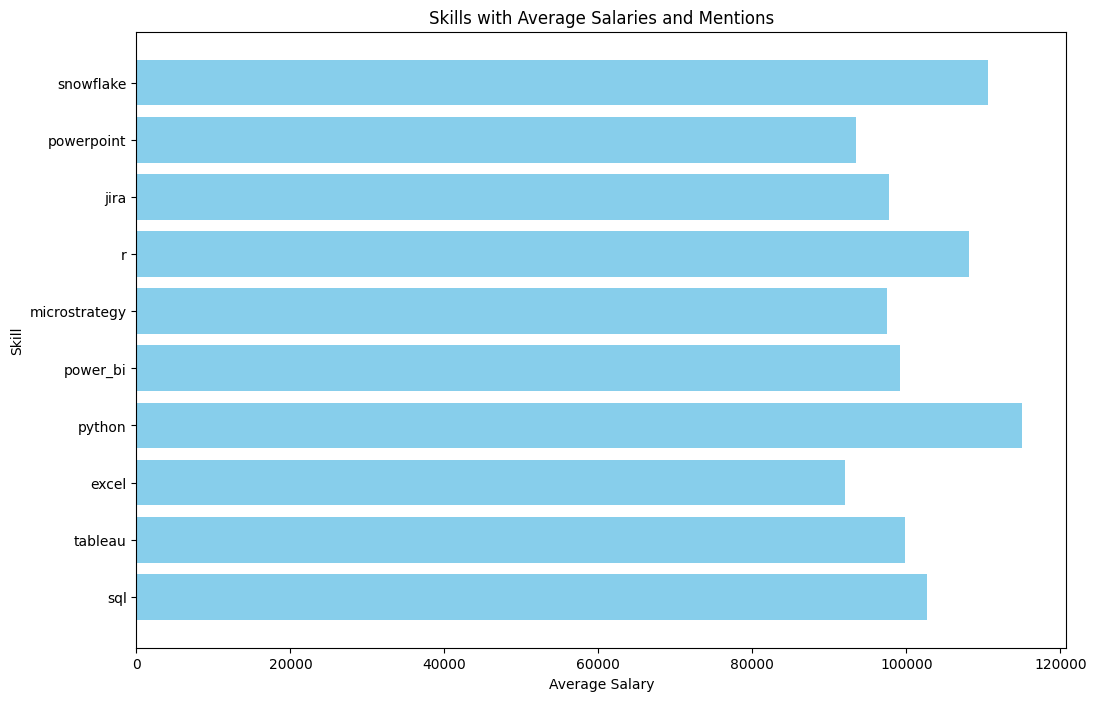

In [84]:
# Plotting
plt.figure(figsize=(12, 8))
plt.barh(top_10_skills['skill'], top_10_skills['salary_avg'], color='skyblue')
plt.xlabel('Average Salary')
plt.ylabel('Skill')
plt.title('Skills with Average Salaries and Mentions')
plt.show()

In [85]:
# Save the merged_skills_df DataFrame to a CSV file
merged_skills_df.to_csv('../data/merged_skills_data.csv', index=False)
